# Assignment 2


In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
import time
import sympy as sp
import pandas as pd
import scipy as scp
%matplotlib inline

Task 1

In [235]:
n = 2000
A = np.random.normal(0, 1, (n, n))

start = time.time()
U_svd, S_svd, V_svd = np.linalg.svd(A)
end = time.time()
print(f'SVD: {np.round(end - start, 2)} s')

start = time.time()
U_svds, S_svds, V_svds = svds(A, k=2)
end = time.time()
print(f'SVDs: {np.round(end - start, 2)} s')

start = time.time()
U_svdr, S_svdr, V_svdr = randomized_svd(A, 2)
end = time.time()
print(f'SVDr: {np.round(end - start, 2)} s')

A_svd_k = U_svd[..., :2] @ np.diag(S_svd)[:2, :2] @ V_svd[:2, ...]
A_svds_k = U_svds @ np.diag(S_svds) @ V_svds
A_svdr_k = U_svdr @ np.diag(S_svdr) @ V_svdr

error_svd = np.linalg.norm(A-A_svd_k)
error_svds = np.linalg.norm(A-A_svds_k)
error_svdr = np.linalg.norm(A-A_svdr_k)

error_svd, error_svds, error_svdr

SVD: 2.94 s
SVDs: 0.72 s
SVDr: 0.12 s


(1995.426450318365, 1995.426450318365, 1995.6495839183974)

Task 2. \
1.
$$ 
\begin{aligned}
(A^TA)^{-1} = (U\Sigma V^T)^T U\Sigma V^T = V (\Sigma^2)^{-1} V^T \\
\end{aligned}
$$
2.
$$ 
\begin{aligned}
(A^TA)^{-1}A^T = V (\Sigma^2)^{-1} V^T (U\Sigma V^T)^T = V \Sigma^{-1} U^T \\
\end{aligned}
$$
3.
$$ 
\begin{aligned}
A(A^TA)^{-1} = U\Sigma V^T V (\Sigma^2)^{-1} V^T = U \Sigma^{-1} V^T \\
\end{aligned}
$$
4.
$$ 
\begin{aligned}
A(A^TA)^{-1}A^T = U \Sigma^{-1} V^T (U\Sigma V^T)^T = I\\
\end{aligned}
$$

Task 3. \
1.

In [2]:
A = sp.Matrix([
        [-2, 11],
        [-10, 5]
    ]) 
A

Matrix([
[ -2, 11],
[-10,  5]])

In [4]:
AAT = A @ A.T
AAT

Matrix([
[125,  75],
[ 75, 125]])

In [6]:
l = sp.Symbol('\lambda')

\lambda

In [13]:
(AAT-l*sp.Matrix([[1,0],[0,1]])).det()

\lambda**2 - 250*\lambda + 10000

$$ \lambda_1 = 200 $$
$$ \lambda_2 = 50 $$

In [19]:
S = sp.Matrix([[10*sp.sqrt(2), 0],[0,5*sp.sqrt(2)]])
S

Matrix([
[10*sqrt(2),         0],
[         0, 5*sqrt(2)]])

In [48]:
AAT_np = np.array(AAT).astype(np.float64)
Ueval, Uevec = np.linalg.eig(AAT_np)
U = Uevec
U

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [69]:
ATA_np = np.array(A.T @ A).astype(np.float64)
Veval, Vevec = np.linalg.eig(ATA_np)
V = Vevec
V.T

array([[-0.8, -0.6],
       [ 0.6, -0.8]])

In [30]:
S_np = np.array(S).astype(np.float64)
S_np

array([[14.14213562,  0.        ],
       [ 0.        ,  7.07106781]])

In [51]:
A_out = U @ S_np @ V.T
np.array(A_out).astype(np.float64)

array([[-11.,  -2.],
       [ -5., -10.]])

2.

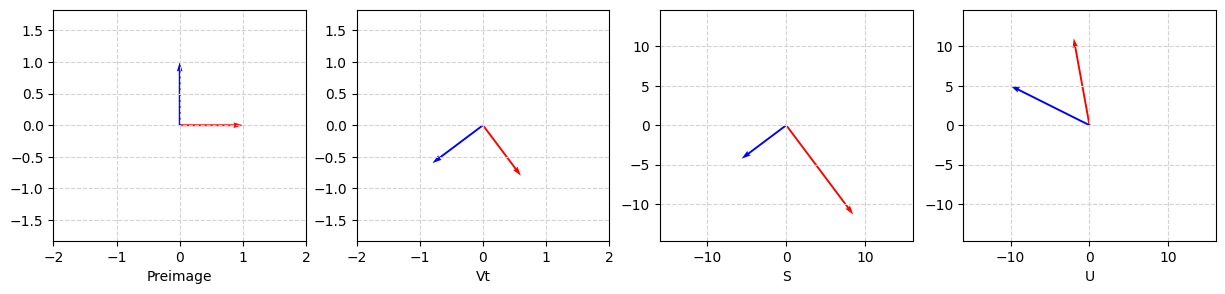

In [231]:
A = np.array([
        [-2, 11],
        [-10, 5]
    ]) 
U, S, V = np.linalg.svd(A)
V.T 
P = np.array([[1, 0], [0, 1]])

Vt = P @ V.T

S = np.diag(S) @ Vt
U1 = U @ S
origin = np.array([[0, 0], [0, 0]])
fig, axis = plt.subplots(1,4)
fig.set_size_inches(15,3)
t = np.linspace(0, 2*np.pi, 100)
for ax in axis:
    ax.axis('equal')
    ax.grid(color='lightgray',linestyle='--')
    
    
axis[0].quiver(*origin, P[:, 0], P[:, 1], color=['r', 'b', 'green'], scale=4)
axis[0].set(xlim=(-2, 2), ylim=(-2, 2))
axis[0].set_xlabel('Preimage')
axis[1].quiver(*origin, Vt[:, 0], Vt[:, 1], color=['r', 'b', 'green'], scale=4)
axis[1].set(xlim=(-2, 2), ylim=(-2, 2))
axis[1].set_xlabel('Vt')
axis[2].quiver(*origin, S[:, 0], S[:, 1], color=['r', 'b', 'green'], scale=32)
axis[2].set(xlim=(-16, 16), ylim=(-16, 16))
axis[2].set_xlabel('S')
axis[3].quiver(*origin, U1[:, 0], U1[:, 1], color=['r', 'b', 'green'], scale=32)
axis[3].set(xlim=(-16, 16), ylim=(-16, 16))
axis[3].set_xlabel('U')
plt.show()

3.
$$ \begin{aligned} ||A||_{F} =  \sqrt{2^2+11^2+10^2+5^2} \approx 15.81 \end{aligned} $$

$$ \begin{aligned} ||A||_{2}  = 10\sqrt{2} \\ \end{aligned} $$


4.

In [234]:
A = sp.Matrix([
        [-2, 11],
        [-10, 5]
    ]) 
A_np = np.array(A).astype(np.float64)
U, S, V = np.linalg.svd(A_np)
A_inv = V @ np.linalg.inv(np.diag(S)) @ U.T
A_inv1 = np.linalg.inv(A_np)
A_inv, A_inv1

(array([[ 0.05, -0.11],
        [ 0.1 , -0.02]]),
 array([[ 0.05, -0.11],
        [ 0.1 , -0.02]]))

5.
$$ \begin{aligned} \lambda_{1} = -2, \lambda_{2} = 5 \end{aligned} $$

In [1]:
hdfName = 'digits.hdf'
pd.HDFStore(hdfName).keys()

images = pd.read_hdf(hdfName, 'images', 'r+')

i_0 = images.loc[0].to_numpy()
row, col = i_0.shape
U, S, V = np.linalg.svd(i_0)
S_2 = np.diag(S[:2])
U_2 = U[..., :2]
V_2 = V[:2, ...]
A_2 =  U_2 @ S_2
np.linalg.matrix_rank(A_2)
plt.figure(figsize=(8, 4.5))

fig, ax = plt.subplots()
for i, color in zip(range(9), ['1', '2', '3', '4', '5', '6', '7', '8', '9']):
    tmp =  images.loc[i] @ images.loc[i].T
    norm = 1
    for j in range(i_0.shape[0]):
        norm += i_0_m[j][j]
    norm = np.sqrt(norm)
    img = images.loc[i].to_numpy()
    img /= norm
    k = 2
    U, S, V = np.linalg.svd(img)
    A_2 =  U[..., :2] @ np.diag(S[:k])
    ax.scatter(A_2[..., 0], A_2[..., 1], label=color)
ax.legend(loc='upper right')
plt.show() 

NameError: name 'pd' is not defined